In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/Advertising.csv", index_col=0) # index_col=0 tar bort första index kolumnen
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## EDA - Exploratory data analysis

* vi vill alltid börja med detta

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
df.describe().T # transponerar

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
df.shape # 200 samples, 3 features(TV, Radio, Newspaper), 1 label (Sales; predicted variable)

(200, 4)

Ser ut som att det är någon form av positiv korrelation på TV och Radio. Newspaper verkar vara mindre korrelerat

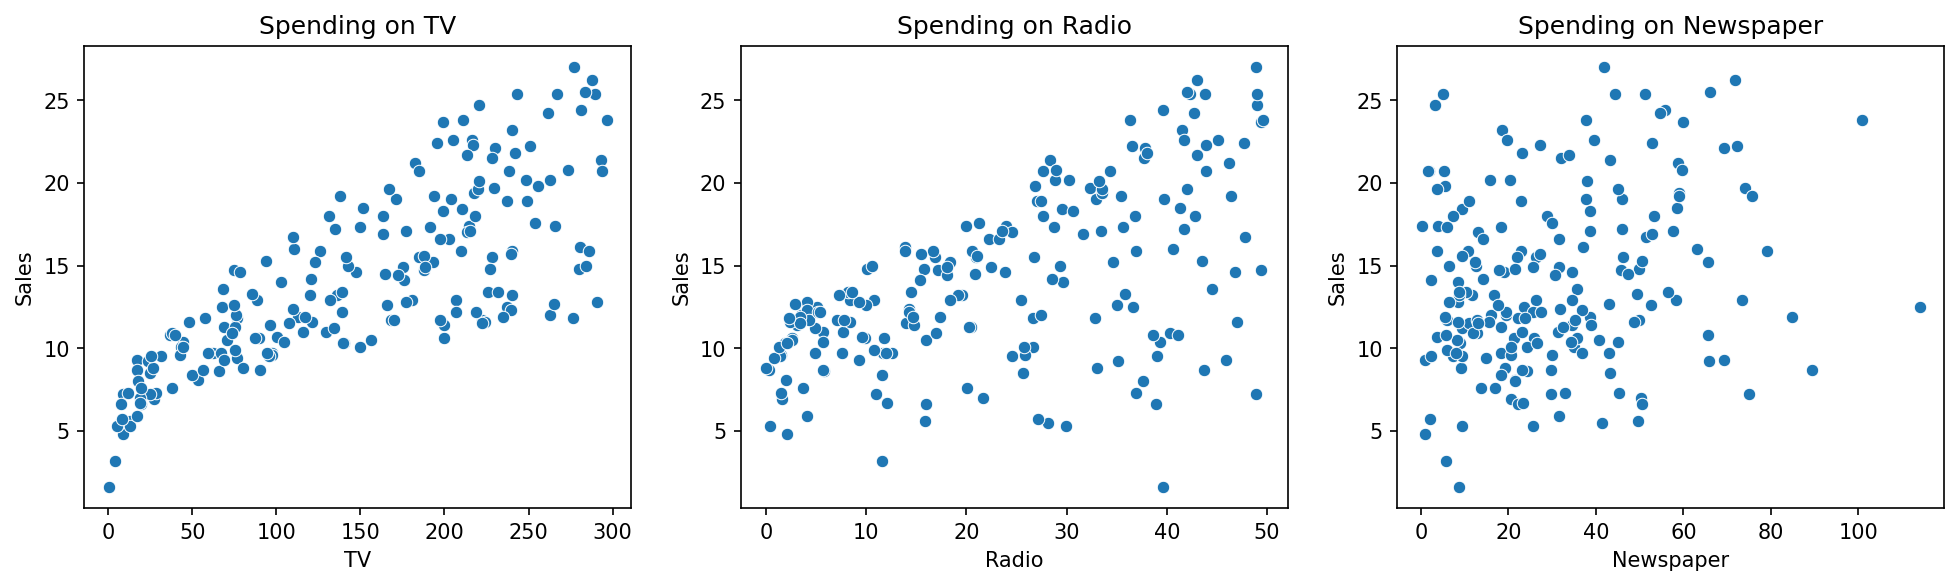

In [22]:
number_features = df.shape[1]-1 # för att kunna skapa olika plottar

#number_features

fig, ax = plt.subplots(1, number_features, figsize = (16,4), dpi = 150)

for i, feature in enumerate(df.columns[:-1]): # alla förutom sales column
    sns.scatterplot(data = df, x = feature, y="Sales", ax=ax[i]) # utan ax=ax[i] hamnar alla punkter i den sista plotten.
    # eftersom jag loopar gneom i och feature, så skrivs index [0] ut och sedan "Sales", som vi har tagit bort från vår dataframe.
    # loop 1; index[0] = TV, "Sales"
    # loop 2; index[1] = Radio, "Sales"
    # loop 3; index[2] = Newspaper, "Sales"
    ax[i].set_title(f"Spending on {feature}")

### annat sätt att göra i princip samma plot

Text(0.5, 0.98, 'Spending on medium compared to sales')

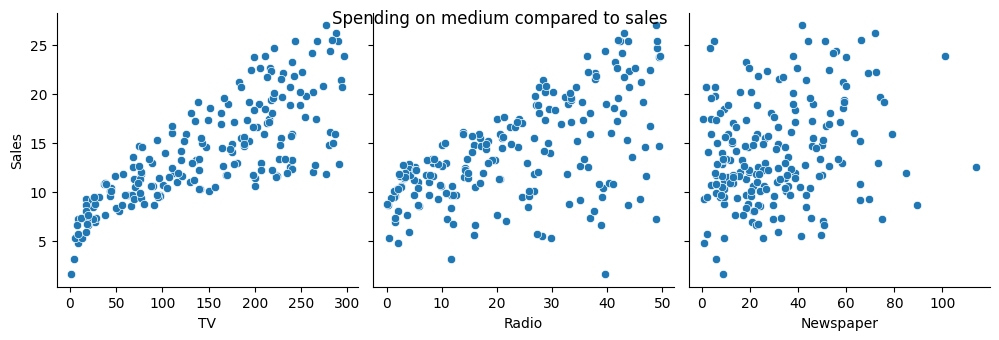

In [20]:
# notera att det inte går att sätta individuella titlar lika enkelt, men man kan snabbt och enkelt göra plots som ovanstående, fast på enbart en kodrad.
sns.pairplot(df, y_vars="Sales", x_vars = df.columns[:-1], height=3.38)
plt.suptitle("Spending on medium compared to sales")

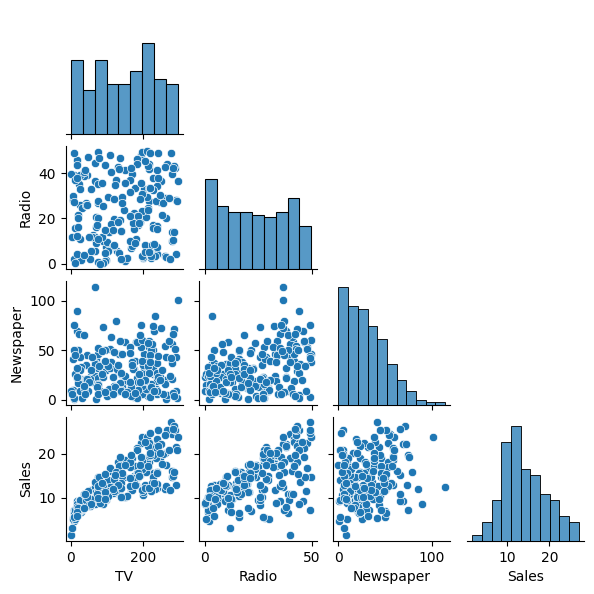

In [18]:
ax = sns.pairplot(df, height = 1.5, corner=True)